<a href="https://colab.research.google.com/github/abou-zithar/AMIT.Machine.learning/blob/main/amit_project_1_Bank_Dataset_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank DataSet

In [8]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### connect with google drive


In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
# reading data using pandas
data = pd.read_csv("/content/drive/MyDrive/Bank.csv", sep=";")

In [11]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
# check the values of col pout come and most of it is unknown
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

#### we will drop poutcome col

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## that data has nulls in the unknown shape 

In [14]:
# replace unknown with nulls first
data.replace('unknown',np.nan,inplace=True)

In [15]:
# check nulls 
data.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [16]:
# drop the cols which is not necessary
data.drop(['poutcome','duration'],axis=1,inplace = True)


In [17]:
# raplace the nulls with the mode of the data because it is a caterogical data
data['contact'].replace(np.nan,data['contact'].mode()[0],inplace=True)
data['education'].replace(np.nan,data['education'].mode()[0],inplace=True)
data['job'].replace(np.nan,data['job'].mode()[0],inplace=True)

In [18]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,1,-1,0,no


## One-Hot Encoding


In [19]:
data_dummies=data.iloc[:,:-1]
target=data['y']

In [20]:

# do one-hot encoding  to the featuers  with  drop frist
data_dummies=pd.get_dummies(data_dummies, columns=['job','marital','education','default','housing','loan','contact','month',], drop_first=True)

In [21]:
# then to the target to make the target the finl col in the data set
target_dummies=pd.get_dummies(target, columns=['y'], drop_first=True)


In [22]:
data_dummies['y']=target_dummies

In [23]:
data_dummies.shape

(45211, 36)

In [24]:
# the final shape of the data 
data_dummies.head()

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,1,-1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,2,5,1,-1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,47,1506,5,1,-1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,1,5,1,-1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## heatMap

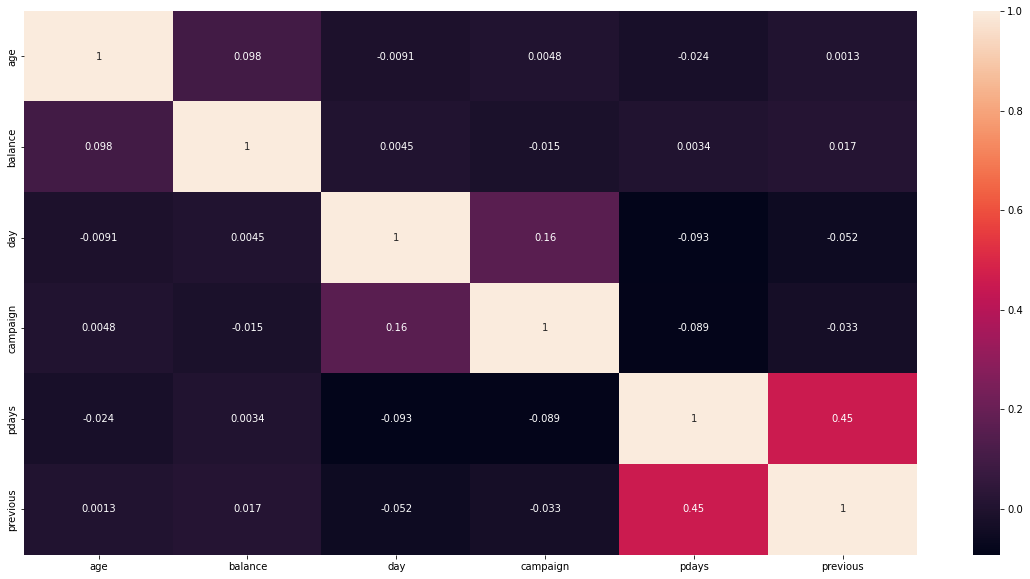

In [53]:
# create a heat 
plt.figure(figsize=(20,10))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()


## check data balance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


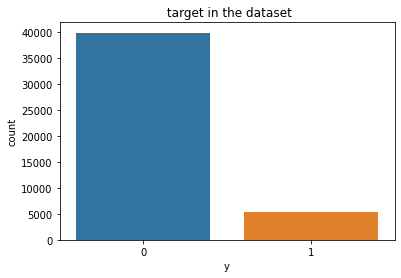

In [44]:
sizes = data_dummies['y']

sns.countplot(sizes )
plt.title(' target in the dataset')
plt.show()

In [27]:
X = data_dummies.iloc[:,:-1]
y = data_dummies.iloc[:,-1]

SMOTE to the target to balance the data 

In [43]:
# useing the smote funcation to extract new feartures and balance the data 
from collections import Counter 
from imblearn.over_sampling import SMOTE
print("Before OverSampling count of labels : {} ".format(Counter(data.y.values)))
smote=SMOTE()

X_resampled,y_resampled=smote.fit_resample(X,y)
print("After OverSampling count of labels : {} ".format(Counter(y_resampled)))

Before OverSampling count of labels : Counter({'no': 39922, 'yes': 5289}) 
After OverSampling count of labels : Counter({0: 39922, 1: 39922}) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


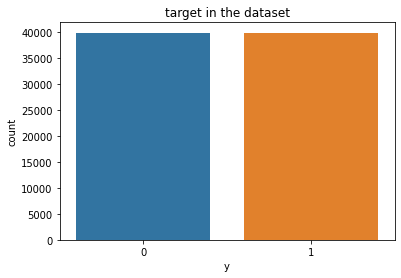

In [41]:
sizes = y_resampled

sns.countplot(sizes, )
plt.title('target in the dataset')
plt.show()

In [45]:
y_resampled.shape

(79844,)

# split data 

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,random_state=42)

## using the random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0,max_depth=22)

In [48]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=22, random_state=0)

In [49]:
model.score(X_train,y_train)

0.9875256750663794

In [50]:
model.score(X_test,y_test)

0.9207454536345875